<a href="https://colab.research.google.com/github/mariabandeira/AdministracaoPublica/blob/main/CadUnico/RandomForest/TrainningKBests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, accuracy_score

### Pré-processamento dos dados

In [2]:
colab = True

if colab == True:
  data2012 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2012.csv")
  data2013 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2013.csv")
  data2014 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2014.csv")
  data2015 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2015.csv")
  data2016 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2016.csv")
  data2017 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2017.csv")
  data2018 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2018.csv")
  data = pd.concat([data2012, data2013, data2014, data2015, data2016, data2017, data2018])
else:
  file_path = '../cadunico_pb_rn_full.ipynb'
  data = pd.read_csv(file_path)

<ipython-input-2-965dafd7cc6b>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2014 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2014.csv")
<ipython-input-2-965dafd7cc6b>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2016 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2016.csv")
<ipython-input-2-965dafd7cc6b>:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data2017 = pd.read_csv("https://raw.githubusercontent.com/mariabandeira/AdministracaoPublica/refs/heads/main/CadUnico/BasesRNPB/cadunico_pb_rn_2017.csv")


In [3]:
data.head()

,index,cd_ibge,estrato,classf,id_familia,dat_cadastramento_fam,dat_alteracao_fam,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,...,ind_familia_quilombola_fam,nom_estab_assist_saude_fam,cod_eas_fam,nom_centro_assist_fam,cod_centro_assist_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,marc_pbf,dat_atualizacao_familia
0,8606,2405801,2,3,1573116.0,2001-11-19,2012-09-26,41,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,4,"4,61492813367753",1,NaN
1,8674,2411429,1,3,2301595.0,2001-11-19,2012-08-06,311,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,2,"6,96709909443676",0,NaN
2,8675,2411429,1,3,2301622.0,2001-11-19,2011-03-11,170,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,3,"6,96709909443676",0,NaN
3,8676,2411429,1,3,2301623.0,2001-11-19,2011-07-22,50,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,4,"4,61362689750316",1,NaN
4,8677,2411429,1,3,2301653.0,2001-11-19,2012-08-16,207,1.0,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,3,"6,96709909443676",0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852254 entries, 0 to 245753
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   index                          int64  
 1   cd_ibge                        int64  
 2   estrato                        int64  
 3   classf                         int64  
 4   id_familia                     float64
 5   dat_cadastramento_fam          object 
 6   dat_alteracao_fam              object 
 7   vlr_renda_media_fam            object 
 8   cod_local_domic_fam            float64
 9   cod_especie_domic_fam          float64
 10  qtd_comodos_domic_fam          float64
 11  qtd_comodos_dormitorio_fam     float64
 12  cod_material_piso_fam          float64
 13  cod_material_domic_fam         float64
 14  cod_agua_canalizada_fam        float64
 15  cod_abaste_agua_domic_fam      float64
 16  cod_banheiro_domic_fam         float64
 17  cod_escoa_sanitario_domic_fam  float64
 18  cod_dest

In [5]:
data.describe()

,index,cd_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,...,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,cod_eas_fam,cod_centro_assist_fam,ind_parc_mds_fam,qtde_pessoas,marc_pbf
count,1.852254e+06,1.852254e+06,1.852254e+06,1.852254e+06,1.852254e+06,1.851432e+06,1.839407e+06,1.781665e+06,1.780486e+06,1.794629e+06,...,1.794599e+06,1.794597e+06,1.780905e+06,1.852253e+06,1.847332e+06,8.292450e+05,2.806270e+05,1.063413e+06,1.852254e+06,1.852254e+06
mean,2.145694e+06,2.463537e+06,1.703418e+00,2.487485e+00,2.432824e+06,1.252806e+00,1.032537e+00,4.695426e+00,1.792278e+00,2.727224e+00,...,1.484487e+00,1.202299e+00,1.932188e+00,1.997343e+00,1.996880e+00,2.986262e+06,2.453982e+10,3.610073e+01,2.971508e+00,6.588832e-01
std,1.495010e+06,5.042349e+04,4.567507e-01,7.243902e-01,1.506920e+06,4.346211e-01,1.865248e-01,1.328345e+00,6.923356e-01,1.382703e+00,...,9.254080e-01,7.997842e-01,9.782872e-01,5.147531e-02,5.576651e-02,1.129241e+06,1.093704e+09,8.098430e+01,1.457211e+00,4.740847e-01
min,4.000000e+00,2.400109e+06,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.376000e+04,1.240020e+10,0.000000e+00,1.000000e+00,0.000000e+00
25%,6.828352e+05,2.408102e+06,1.000000e+00,2.000000e+00,9.359012e+05,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.381206e+06,2.408102e+10,0.000000e+00,2.000000e+00,0.000000e+00
50%,1.987342e+06,2.501906e+06,2.000000e+00,3.000000e+00,2.323558e+06,1.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.597233e+06,2.501100e+10,0.000000e+00,3.000000e+00,1.000000e+00
75%,3.457813e+06,2.507507e+06,2.000000e+00,3.000000e+00,3.855160e+06,2.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,...,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,3.012174e+06,2.510800e+10,0.000000e+00,4.000000e+00,1.000000e+00
max,5.356580e+06,2.517407e+06,2.000000e+00,3.000000e+00,5.386861e+06,2.000000e+00,3.000000e+00,2.000000e+01,2.000000e+01,7.000000e+00,...,6.000000e+00,6.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,9.542973e+06,2.517400e+10,3.060000e+02,3.100000e+01,1.000000e+00


In [6]:
# removendo colunas que não se encontram em um formato adequado para um treinamento de ML
data = data.drop(columns=['dat_cadastramento_fam', 'dat_alteracao_fam', 'dat_atualizacao_familia', 'nom_estab_assist_saude_fam', 'cod_eas_fam', 'nom_centro_assist_fam', 'cod_centro_assist_fam', 'index'])

data.head()

,cd_ibge,estrato,classf,id_familia,vlr_renda_media_fam,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,...,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,peso.fam,marc_pbf
0,2405801,2,3,1573116.0,41,1.0,1.0,7.0,2.0,5.0,...,3.0,1.0,1.0,1.0,2.0,2.0,NaN,4,"4,61492813367753",1
1,2411429,1,3,2301595.0,311,1.0,1.0,5.0,1.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,2,"6,96709909443676",0
2,2411429,1,3,2301622.0,170,1.0,1.0,7.0,1.0,1.0,...,1.0,6.0,1.0,1.0,2.0,2.0,NaN,3,"6,96709909443676",0
3,2411429,1,3,2301623.0,50,1.0,1.0,5.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,4,"4,61362689750316",1
4,2411429,1,3,2301653.0,207,1.0,1.0,5.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,NaN,3,"6,96709909443676",0


In [7]:
# verificando linhas duplicadas devido a mesclagem de diferentes datasets
duplicados = data.duplicated(subset=['id_familia'], keep=False)

# print("Registros dublicados encontrados");
# print(data[duplicados])

data = data.drop_duplicates(subset=['id_familia'], keep='first')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549775 entries, 0 to 245753
Data columns (total 24 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   cd_ibge                        1549775 non-null  int64  
 1   estrato                        1549775 non-null  int64  
 2   classf                         1549775 non-null  int64  
 3   id_familia                     1549775 non-null  float64
 4   vlr_renda_media_fam            1549772 non-null  object 
 5   cod_local_domic_fam            1549110 non-null  float64
 6   cod_especie_domic_fam          1537329 non-null  float64
 7   qtd_comodos_domic_fam          1490435 non-null  float64
 8   qtd_comodos_dormitorio_fam     1489194 non-null  float64
 9   cod_material_piso_fam          1503008 non-null  float64
 10  cod_material_domic_fam         1502979 non-null  float64
 11  cod_agua_canalizada_fam        1502977 non-null  float64
 12  cod_abaste_agua_domi

In [9]:
data.describe()

,cd_ibge,estrato,classf,id_familia,cod_local_domic_fam,cod_especie_domic_fam,qtd_comodos_domic_fam,qtd_comodos_dormitorio_fam,cod_material_piso_fam,cod_material_domic_fam,...,cod_banheiro_domic_fam,cod_escoa_sanitario_domic_fam,cod_destino_lixo_domic_fam,cod_iluminacao_domic_fam,cod_calcamento_domic_fam,cod_familia_indigena_fam,ind_familia_quilombola_fam,ind_parc_mds_fam,qtde_pessoas,marc_pbf
count,1.549775e+06,1.549775e+06,1.549775e+06,1.549775e+06,1.549110e+06,1.537329e+06,1.490435e+06,1.489194e+06,1.503008e+06,1.502979e+06,...,1.502978e+06,1.403818e+06,1.502979e+06,1.502977e+06,1.489557e+06,1.549774e+06,1.545851e+06,816968.000000,1.549775e+06,1.549775e+06
mean,2.462913e+06,1.713988e+00,2.472823e+00,2.504649e+06,1.250239e+00,1.031598e+00,4.687205e+00,1.790924e+00,2.714115e+00,1.212593e+00,...,1.059475e+00,2.159214e+00,1.483216e+00,1.206869e+00,1.930749e+00,1.997469e+00,1.997024e+00,36.422128,2.996547e+00,6.638228e-01
std,5.049812e+04,4.518951e-01,7.291618e-01,1.496534e+06,4.331508e-01,1.839015e-01,1.328447e+00,6.929218e-01,1.379644e+00,7.945718e-01,...,2.365109e-01,9.862501e-01,9.279687e-01,8.090084e-01,9.781926e-01,5.024869e-02,5.446884e-02,81.333791,1.460671e+00,4.724005e-01
min,2.400109e+06,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,1.000000e+00,0.000000e+00
25%,2.408102e+06,1.000000e+00,2.000000e+00,1.150394e+06,1.000000e+00,1.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000,2.000000e+00,0.000000e+00
50%,2.501807e+06,2.000000e+00,3.000000e+00,2.424144e+06,1.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000,3.000000e+00,1.000000e+00
75%,2.507507e+06,2.000000e+00,3.000000e+00,3.890456e+06,2.000000e+00,1.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,...,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,0.000000,4.000000e+00,1.000000e+00
max,2.517407e+06,2.000000e+00,3.000000e+00,5.386861e+06,2.000000e+00,3.000000e+00,2.000000e+01,2.000000e+01,7.000000e+00,8.000000e+00,...,2.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,3.000000e+00,2.000000e+00,2.000000e+00,306.000000,1.700000e+01,1.000000e+00


In [10]:
# colunas que precisam de tratamento de tipos
columns_to_convert = ['vlr_renda_media_fam', 'peso.fam']

for column in columns_to_convert:
    data[column] = data[column].replace(',', '.', regex=True).astype(float)

# verificando valores ausentes em cada coluna
missing_values = data.isnull().sum()

print('As colunas com valores ausentes são:\n', (missing_values))

As colunas com valores ausentes são:
 cd_ibge                               0
estrato                               0
classf                                0
id_familia                            0
vlr_renda_media_fam                   3
cod_local_domic_fam                 665
cod_especie_domic_fam             12446
qtd_comodos_domic_fam             59340
qtd_comodos_dormitorio_fam        60581
cod_material_piso_fam             46767
cod_material_domic_fam            46796
cod_agua_canalizada_fam           46798
cod_abaste_agua_domic_fam         46796
cod_banheiro_domic_fam            46797
cod_escoa_sanitario_domic_fam    145957
cod_destino_lixo_domic_fam        46796
cod_iluminacao_domic_fam          46798
cod_calcamento_domic_fam          60218
cod_familia_indigena_fam              1
ind_familia_quilombola_fam         3924
ind_parc_mds_fam                 732807
qtde_pessoas                          0
peso.fam                              0
marc_pbf                              0
dt

In [11]:
columns_to_remove = ['cod_escoa_sanitario_domic_fam', 'ind_parc_mds_fam', 'id_familia']

data = data.drop(columns=columns_to_remove, axis=1)

# removendo linhas com valores ausentes
data = data.dropna()

#missing_values = data.isnull().sum()
#print('As colunas com valores ausentes são:\n', (missing_values))
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484779 entries, 0 to 245753
Data columns (total 21 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   cd_ibge                     1484779 non-null  int64  
 1   estrato                     1484779 non-null  int64  
 2   classf                      1484779 non-null  int64  
 3   vlr_renda_media_fam         1484779 non-null  float64
 4   cod_local_domic_fam         1484779 non-null  float64
 5   cod_especie_domic_fam       1484779 non-null  float64
 6   qtd_comodos_domic_fam       1484779 non-null  float64
 7   qtd_comodos_dormitorio_fam  1484779 non-null  float64
 8   cod_material_piso_fam       1484779 non-null  float64
 9   cod_material_domic_fam      1484779 non-null  float64
 10  cod_agua_canalizada_fam     1484779 non-null  float64
 11  cod_abaste_agua_domic_fam   1484779 non-null  float64
 12  cod_banheiro_domic_fam      1484779 non-null  float64
 13  cod

In [23]:
feature_names = data.columns.tolist()
feature_names.remove('marc_pbf')

In [12]:
# identificando colunas com apenas um valor
single_value_columns = [col for col in data.columns if data[col].nunique() == 1 | 0]

print(f"Colunas com um único valor: {single_value_columns}")

data = data.drop(columns=single_value_columns)

Colunas com um único valor: ['cod_especie_domic_fam', 'cod_familia_indigena_fam']


<Axes: >

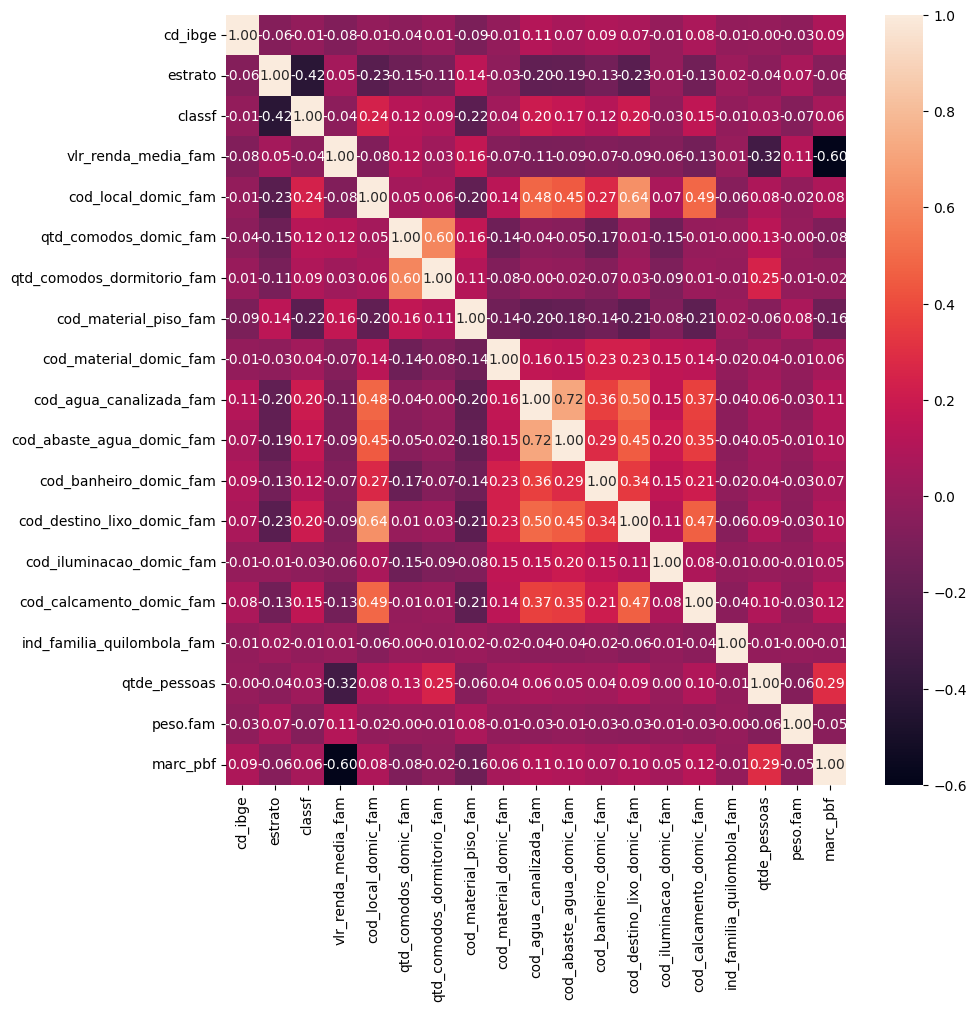

In [13]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, fmt=".2f")

In [14]:
# removendo colunas de correlação próxima a 0 (em relação a marc_pbf)

correlation = data.corr()
correlation = correlation['marc_pbf'].abs()
correlation = correlation[correlation < 0.09]
correlation = correlation[correlation > -0.09]
columns_to_remove = correlation.index
columns_to_remove

Index(['cd_ibge', 'estrato', 'classf', 'cod_local_domic_fam',
       'qtd_comodos_domic_fam', 'qtd_comodos_dormitorio_fam',
       'cod_material_domic_fam', 'cod_banheiro_domic_fam',
       'cod_iluminacao_domic_fam', 'ind_familia_quilombola_fam', 'peso.fam'],
      dtype='object')

In [15]:
# atualizando o dataset apenas com as variaveis de mais forte correlação
_data = data.drop(columns=columns_to_remove)
_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1484779 entries, 0 to 245753
Data columns (total 8 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   vlr_renda_media_fam         1484779 non-null  float64
 1   cod_material_piso_fam       1484779 non-null  float64
 2   cod_agua_canalizada_fam     1484779 non-null  float64
 3   cod_abaste_agua_domic_fam   1484779 non-null  float64
 4   cod_destino_lixo_domic_fam  1484779 non-null  float64
 5   cod_calcamento_domic_fam    1484779 non-null  float64
 6   qtde_pessoas                1484779 non-null  int64  
 7   marc_pbf                    1484779 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 102.0 MB


### Treinando o modelo RF

In [16]:
# analisando a distribuição da variável alvo (marc_pbf)
target_distribution = _data['marc_pbf'].value_counts(normalize=True) * 100

print(round(target_distribution))

marc_pbf
1    67.0
0    33.0
Name: proportion, dtype: float64


In [17]:
# separar X (features) e y (target)
X = data.drop('marc_pbf', axis=1)
y = data['marc_pbf']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# aplicando SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(y_train_balanced.value_counts())

marc_pbf
1    692773
0    692773
Name: count, dtype: int64


In [18]:
# criar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, class_weight='balanced')
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [19]:
# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar métricas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Métrica ROC-AUC
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82    148495
           1       0.90      0.94      0.92    296939

    accuracy                           0.89    445434
   macro avg       0.88      0.86      0.87    445434
weighted avg       0.88      0.89      0.88    445434

Matriz de Confusão:
[[116309  32186]
 [ 18633 278306]]
AUC-ROC: 0.9242251468318867


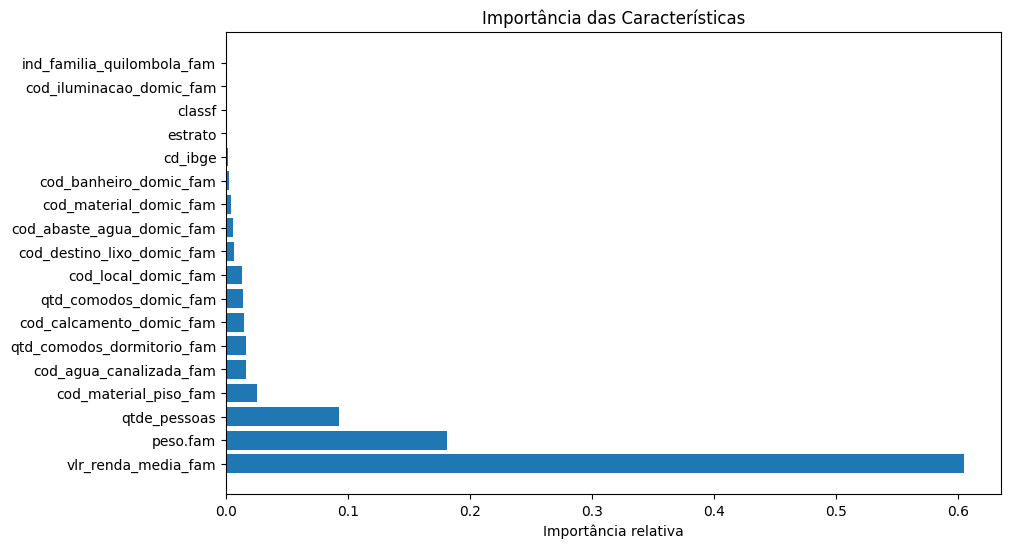

In [24]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Obtendo a importância das características
importances = rf_model.feature_importances_

# Ordenando as características de acordo com a importância
indices = np.argsort(importances)[::-1]

# Visualizando a importância das características
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), np.array(feature_names)[indices])  # Se tiver os nomes das características
plt.xlabel("Importância relativa")
plt.show()

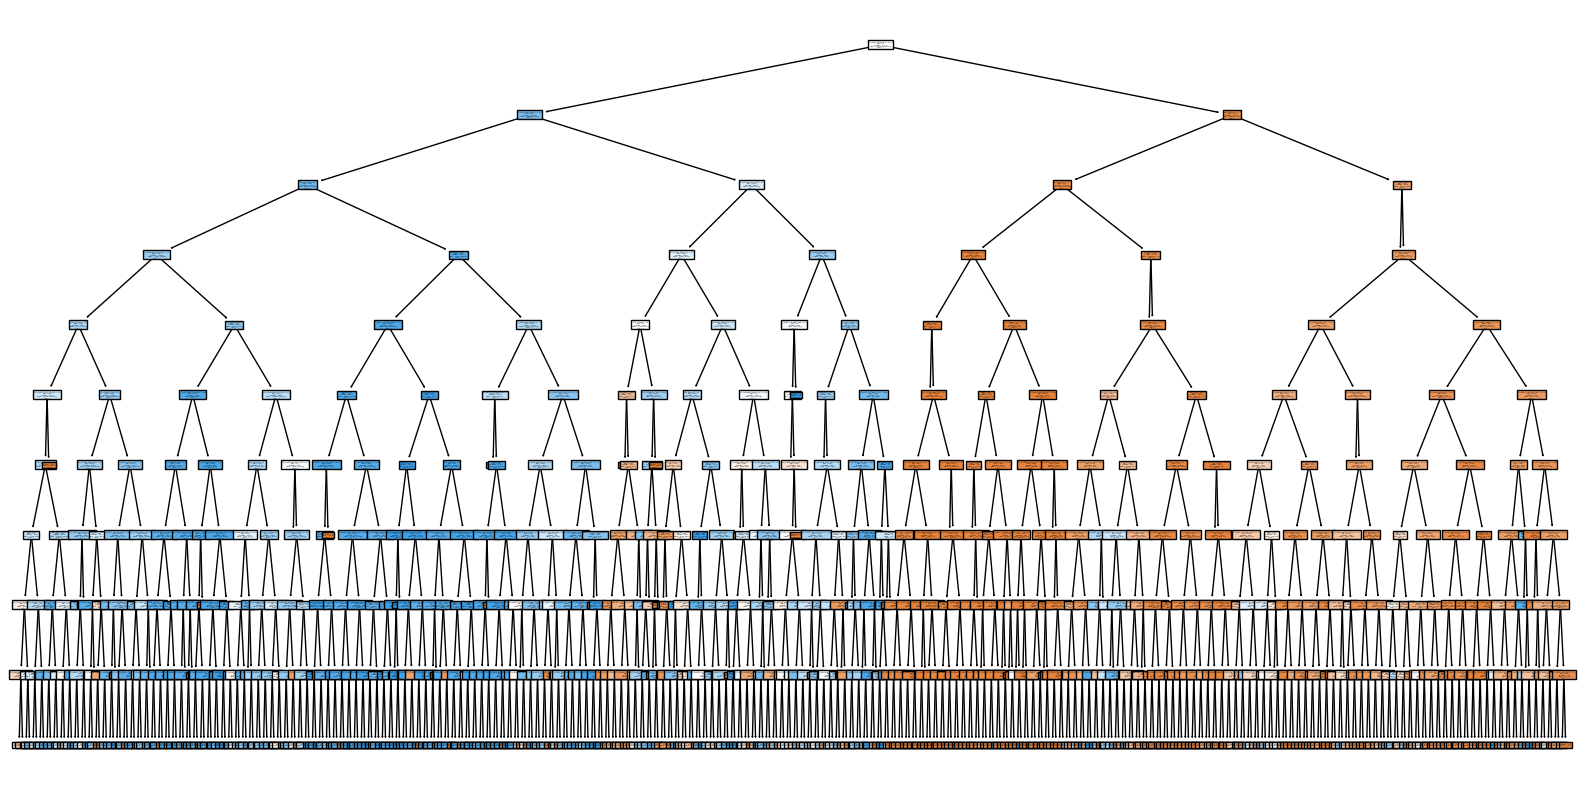

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert rf_model.classes_ to strings
class_names_str = [str(c) for c in rf_model.classes_]

# Visualizando a primeira árvore
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=feature_names, class_names=class_names_str) # Using the converted class names
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Supondo que o modelo RandomForestClassifier já esteja treinado
importances = rf_model.feature_importances_

# Encontrar o índice da árvore com maior importância para as características
# Você pode usar alguma métrica de importância para escolher a árvore mais relevante
tree_importance = np.array([np.sum([node.impurity for node in tree.tree_.__getstate__()['nodes']]) for tree in rf_model.estimators_])

# Identificar a árvore com maior importância global
important_tree_index = np.argmax(tree_importance)

# Visualizar a árvore mais importante
plt.figure(figsize=(20, 10))
plot_tree(rf_model.estimators_[important_tree_index], filled=True, feature_names=feature_names, class_names=rf_model.classes_)
plt.show()

print(f"A árvore mais importante é a árvore #{important_tree_index}")

In [ ]:
import shap

# Criando o objeto explicador para RandomForest
explainer = shap.TreeExplainer(rf_model)

# Calculando os valores SHAP para a amostra de teste
shap_values = explainer.shap_values(X_test)

# Visualizando o resumo global das contribuições das características
shap.summary_plot(shap_values, X_test)

### Selecionando features com SelectKBests

In [20]:
selector = SelectKBest(score_func=f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_balanced, y_train_balanced)
X_test_selected = selector.transform(X_test)

selected_columns = X_train.columns[selector.get_support()]
print("Características selecionadas:", selected_columns)

Características selecionadas: Index(['vlr_renda_media_fam', 'cod_material_piso_fam',
       'cod_agua_canalizada_fam', 'cod_calcamento_domic_fam', 'qtde_pessoas'],
      dtype='object')


In [21]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train_balanced)

RandomForestClassifier(random_state=42)

In [22]:
# Fazer previsões
y_pred = model.predict(X_test_selected)

# Avaliar métricas
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Métrica ROC-AUC
y_pred_prob = model.predict_proba(X_test_selected)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77    148495
           1       0.87      0.93      0.90    296939

    accuracy                           0.86    445434
   macro avg       0.85      0.82      0.83    445434
weighted avg       0.86      0.86      0.85    445434

Matriz de Confusão:
[[105838  42657]
 [ 20945 275994]]
AUC-ROC: 0.8841713188592579
